# Lista 4

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import time

## Exercício 1

Implementar método Francis. Utilizar matrizes simétricas com dimensões $n=10, 100, 500, 1000$.

In [14]:
def FrancisMethod(n, Max_It, Tol):
    
    # Definir matriz randomica de dimensão n
    # Transformar em Simetrica
    k = 0
    E = 0
    V = np.identity(n)
    A = np.zeros(shape=(n,n))
    for x in range (n):
        for y in range (n):
            A[x,y]=A[y,x]= np.random.randint(0,100)
            if (x!=y and abs(A[x][y]>E)):
                E = abs(A[x][y])

    #print("Matriz Original: ",A, "\n")

    while(E >= Tol and k < Max_It):              # Enquanto E > TOL e k < MAX_IT
        Q, R = scp.linalg.qr(A)                      # A0 = Calcular Fatoração = QR
        A = R@Q                                  # Definir A1 = RQ
        V = V@Q 

        for i in range(n):
            for j in range(n):
                if(i!=j and abs(A[i][j])>E):
                    E = abs(A[i][j])
        k += 1 

    return A

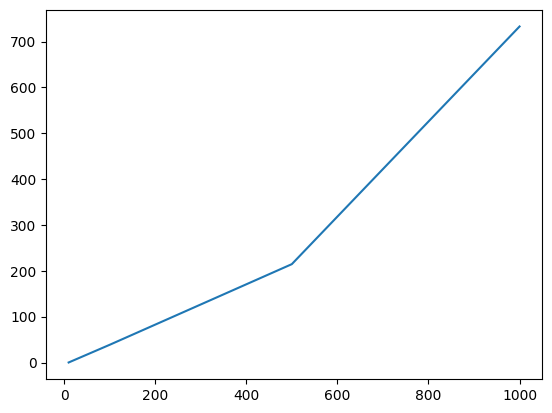

In [15]:
N = [10, 100, 500, 1000]
max_it = 10**3
tol = 10**-8
timeList = []

for i in N:
    t = time.time()
    FrancisMethod(i, max_it, tol)
    timeList.append(time.time() - t)


#print(temp)
plt.plot(N, timeList)

## Exercício 2

Implementar uma função que cria uma matriz cheia de dimensão $n$ e com $n$ autovalores.

#### Solução

Criar uma matriz diagonal $D_{n\times n}$ com os autovalores passados $\lambda_1, \lambda_2, ..., \lambda_n$. Utilizamos essa matriz para encontrar seus autovetores de forma a construir a matriz $M_{n\times n}$. Utilizando o teorema da Diagonalização ($D = M^{-1}AM$) e Semelhança de Matrizes ($\det A = \det D$), podemos dizer que $A = MDM^{-1}$, sendo $A_{n\times n}$ uma matriz semelhante a $D$, assim tendo os mesmos autovalores de $D$.

In [14]:
# DIAGONALIZAÇÃO - https://www.ufrgs.br/reamat/AlgebraLinear/livro/s11-diagonalizax00e7x00e3o.html
# SEMELHANÇA - https://pt.wikipedia.org/wiki/Matrizes_semelhantes

def CriaMatriz(n, autovalues):
    
    D = np.zeros(shape=(n,n))
    M = scp.stats.ortho_group.rvs(n)                          # Matriz de Autovalores

    if(len(autovalues) != n):
        return D
    
    for i in range(n):                              # Criar matriz diagonal (D) com autovalores
        D[i][i] = autovalues[i]

    A = M @ D @ np.linalg.inv(M)                    # Encontrar Matriz Semelhante A = MDM^{-1}

    return A

In [15]:
n = 10
lambdas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A = CriaMatriz(n, lambdas)
print("MATRIZ DE ORGIGEM: \n", np.round(A, 1))

autovalores, v = scp.linalg.eigh(A)
print("\nUtilizando função requisitada: \n", autovalores)


MATRIZ DE ORGIGEM: 
 [[ 5.6  0.8 -0.2  1.  -0.2 -0.  -2.1 -0.   0.8  0.1]
 [ 0.8  5.2 -1.9 -0.1 -1.9  0.2 -0.3  0.3  0.8  0.2]
 [-0.2 -1.9  6.8 -1.1  0.1 -0.1  0.1  1.  -1.4 -1. ]
 [ 1.  -0.1 -1.1  6.6 -0.8 -0.1  0.1  0.9 -0.7  0.8]
 [-0.2 -1.9  0.1 -0.8  4.4  0.8 -0.5 -0.4  1.6  0.1]
 [-0.   0.2 -0.1 -0.1  0.8  5.3  1.3  0.4  0.7  0.6]
 [-2.1 -0.3  0.1  0.1 -0.5  1.3  7.7 -0.8  0.1  0.5]
 [-0.   0.3  1.   0.9 -0.4  0.4 -0.8  5.   2.   0.7]
 [ 0.8  0.8 -1.4 -0.7  1.6  0.7  0.1  2.   5.   0.5]
 [ 0.1  0.2 -1.   0.8  0.1  0.6  0.5  0.7  0.5  3.5]]

Utilizando função requisitada: 
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## Exercício 3

Mostrar que o exercício 2 é solução do problema 1.

## Exercício 4

Calcular o coeficiente $c_k$ e $\phi_k$ a partide uma condição inicial de posição $U_0$ e de uma velocidade inicial $V_0$.


$$\begin{}w(x,y,0)=u_0(x,y)$$

In [16]:
def ij2n (i, j, N):
    return i + j*N

In [17]:
def BuildMatrizesEigen(N1, N2, sigma, rho, e, delta):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scp.sparse.diags([d3, d2, d1, d2, d3],
    [-N1, -1, 0, 1, N1], format='csr')
    
    # Force the eigenvalues associated to boundary points
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')
                                          
    # Lados verticais
    for k in range(0,N2):
        Ic = ij2n(0,k,N1) # Left
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        Ic = ij2n(N1-1,k,N1) # Right
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Lados horizontais
    for k in range(0,N1):
        Ic = ij2n(k,0,N1) # Bottom
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        Ic = ij2n(k,N2-1,N1) # Top
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scp.sparse.identity(nunk, format='csr')

    return K, M